In [2]:
pip install scholarly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.0/512.0 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.6/131.6 kB 10.5 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.4-py3-none-any.whl size=43609 sha256=d88d1b2028b9213e0726f09c93c35f92a9c0c56bb3ec8f13174f388166c72a55
  Stored in directory: /root/.cache/pip/wheels/54/f8/e6/ecfceb6af875ddc5096bb3811795ac336f50371009a601454d
  Created whee

In [1]:
import re
import requests
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date
from lxml import html
from scholarly import scholarly

In [2]:
jiyong_scholar_id   = "Rzo4xm4AAAAJ"
frank_scholar_id   = "Xmg-mDMAAAAJ"
homero_scholar_id  = "T3VspYkAAAAJ"
heather_scholar_id = "fLD0R7QAAAAJ"
fuyuan_scholar_id   = "b5gwU-wAAAAJ"
mary_scholar_id   = "MGIJ8gMAAAAJ"
patrick_scholar_id  = "eZUkwY0AAAAJ"
mike_scholar_id = "ujIMjNwAAAAJ"
chris_scholar_id  = "65Cg6DMAAAAJ"
shyam_scholar_id = "KP-DwH0AAAAJ"

In [10]:
scholar_ids = {
    "jiyong": jiyong_scholar_id,
    "frank": frank_scholar_id,
    "homero": homero_scholar_id,
    "heather": heather_scholar_id,
    "fuyuan": fuyuan_scholar_id,
    "mary": mary_scholar_id,
    "patrick": patrick_scholar_id,
    "mike": mike_scholar_id,
    "chris": chris_scholar_id,
    "shyam": shyam_scholar_id
}

authors = {}

In [11]:
for name, scholar_id in scholar_ids.items():
    globals()[f"{name}_author"] = scholarly.fill(
        scholarly.search_author_id(scholar_id),
        sections=["basics", "indices", "counts", "publications"]
    )

In [12]:
print("\n------------------------------")
print("Google Scholar Profile Summaries")
print("------------------------------")

authors = [
    jiyong_author,
    frank_author,
    homero_author,
    heather_author,
    fuyuan_author,
    mary_author,
    patrick_author,
    mike_author,
    chris_author,
    shyam_author
]

for author in authors:
    profile = pd.DataFrame([{
        "name": author.get("name", ""),
        "affiliation": author.get("affiliation", ""),
        "citedby": author.get("citedby", ""),
        "hindex": author.get("hindex", ""),
        "i10index": author.get("i10index", "")
    }])

    author_name = author.get("name", "")
    print("\n" + author_name)
    print(profile)



------------------------------
Google Scholar Profile Summaries
------------------------------

Jiyoung Cha
          name                    affiliation  citedby  hindex  i10index
0  Jiyoung Cha  Pennsylvania State University     1789      17        20

Frank Dardis
           name                                        affiliation  citedby  \
0  Frank Dardis  Department of Advertising & Public Relations, ...     1709   

   hindex  i10index  
0      21        24  

Homero Gil de Zúñiga
                   name                                        affiliation  \
0  Homero Gil de Zúñiga  Distinguished Research Prof. University of Sal...   

   citedby  hindex  i10index  
0    26507      72       157  

Heather Shoenberger
                  name                        affiliation  citedby  hindex  \
0  Heather Shoenberger  The Pennsylvania State University     1133      15   

   i10index  
0        20  

Fuyuan Shen
          name            affiliation  citedby  hindex  i10index
0  

In [13]:
print("\n------------------------------")
print("Recent Publications (first 5)")
print("------------------------------")


------------------------------
Recent Publications (first 5)
------------------------------


In [16]:
for author in authors:
    pubs_df = pd.json_normalize(author["publications"][:5])
    author_name = author.get("name", "")
    globals()[f"{name}_pubs_df"] = pubs_df

    print("\n" + author_name)
    print(pubs_df[["bib.title", "bib.pub_year"]].head(5))


Jiyoung Cha
                                           bib.title bib.pub_year
0  Shopping on social networking Web sites: Attit...         2009
1  Exploring the internet as a unique shopping ch...         2011
2  Substitutability between online video platform...         2012
3  Predictors of television and online video plat...         2013
4  Factors affecting the frequency and amount of ...         2010

Frank Dardis
                                           bib.title bib.pub_year
0  Is it a sense of autonomy, control, or attachm...         2015
1  Marginalization devices in US press coverage o...         2006
2  Prescribing versus describing: Testing image r...         2009
3  Gaming across different consoles: exploring th...         2011
4  Media framing of capital punishment and its im...         2008

Homero Gil de Zúñiga
                                           bib.title bib.pub_year
0  Who Interacts on the Web?: The Intersection of...         2010
1  Social Media Use for New

In [18]:
cts = []

for author in authors:
    ct = pd.DataFrame(
        list(author["cites_per_year"].items()),
        columns=["year", "cites"]
    )
    ct["name"] = author.get("name", "")
    ct = ct.sort_values("year")

    cts.append(ct)

In [19]:
citation_df = pd.concat(cts, ignore_index=True)

print("\nCombined citation data (first 10 rows):")
print(citation_df.head(10))


Combined citation data (first 10 rows):
   year  cites         name
0  2009      6  Jiyoung Cha
1  2010     17  Jiyoung Cha
2  2011     28  Jiyoung Cha
3  2012     53  Jiyoung Cha
4  2013     77  Jiyoung Cha
5  2014     94  Jiyoung Cha
6  2015    128  Jiyoung Cha
7  2016    135  Jiyoung Cha
8  2017    135  Jiyoung Cha
9  2018    144  Jiyoung Cha


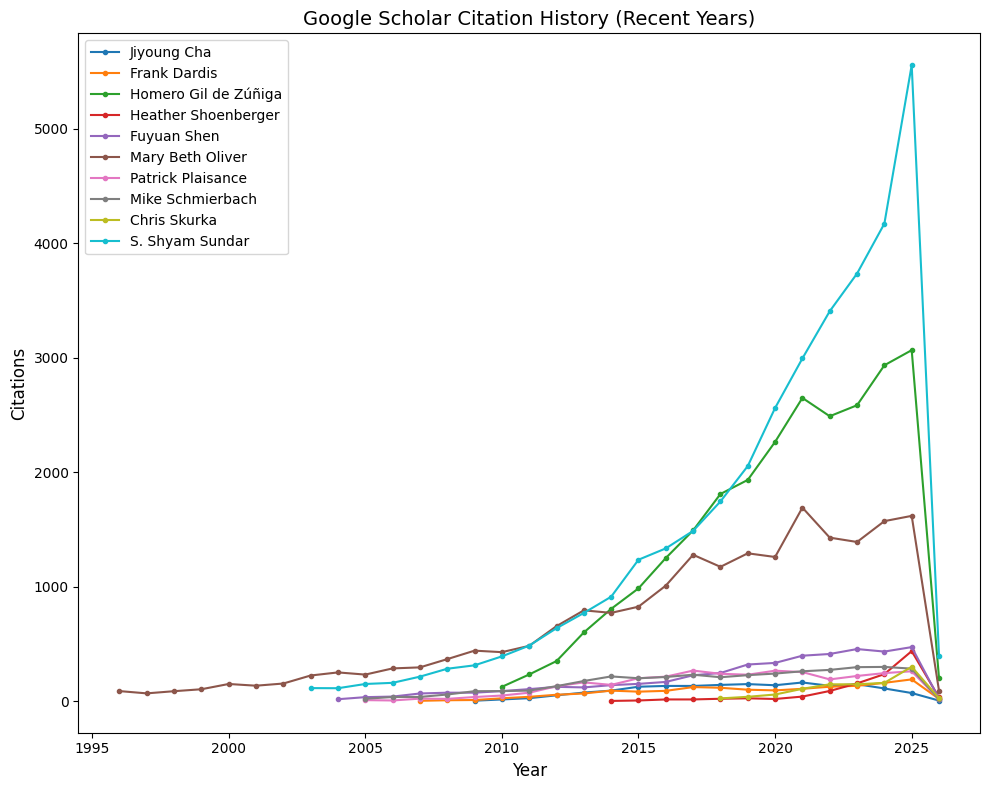

In [37]:
plt.figure(figsize=(10, 8))

for ct in cts:
    name = ct["name"].iloc[0]
    plt.plot(
        ct["year"],
        ct["cites"],
        marker="o",
        markersize=3,
        linewidth=1.5,
        label=name
    )

plt.title("Google Scholar Citation History (Recent Years)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Citations", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()



In [21]:
median_cites = (
    citation_df
    .groupby("name", as_index=False)["cites"]
    .median()
    .rename(columns={"cites": "median_cites"})
)

print("\nMedian citations per year (by faculty):")
print(median_cites)


Median citations per year (by faculty):
                   name  median_cites
0          Chris Skurka         110.0
1          Frank Dardis          93.0
2           Fuyuan Shen         142.0
3   Heather Shoenberger          27.0
4  Homero Gil de Zúñiga        1493.0
5           Jiyoung Cha         120.5
6      Mary Beth Oliver         443.0
7      Mike Schmierbach         206.5
8     Patrick Plaisance         179.0
9       S. Shyam Sundar         843.0
